# Loading the dependencies and libraries

In [1]:
# ! pip install pandas-profiling

In [2]:
# to display plots inline, Change the backend for Matplotlib 
%matplotlib

Using matplotlib backend: <object object at 0x1099a2910>


In [3]:
pip install --upgrade notebook

Note: you may need to restart the kernel to use updated packages.


In [4]:
! pip install matplotlib --upgrade
! pip install seaborn --upgrade

In [5]:
from sklearn import linear_model
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as mno

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# Loading the data

In [8]:
import pandas as pd

# Path to your CSV file
csv_path = '/Users/mac/Desktop/Summer_2023/datathon/paper_methods/pulseox_dataset.csv'

# Read the CSV file using Pandas
df_initial = pd.read_csv(csv_path, low_memory=False)

# Data Preprocessing

In [9]:
df_initial

,unique_subject_id,unique_hospital_admission_id,unique_icustay_id,subject_id,hospital_admission_id,icustay_id,source_db,hospitalid,numbedscategory,teachingstatus,...,delta_sofa_future_coagulation_24hr,sofa_future_coagulation_24hr,delta_sofa_future_liver_24hr,sofa_future_liver_24hr,delta_sofa_future_cardiovascular_24hr,sofa_future_cardiovascular_24hr,delta_sofa_future_cns_24hr,sofa_future_cns_24hr,delta_sofa_future_renal_24hr,sofa_future_renal_24hr
0,0,0,0,002-10050,183274,211144,eicu,71,100 - 249,False,...,1525.0,1.0,1525.0,0.0,1525.0,1.0,1525.0,0.0,1525.0,0.0
1,1,1,1,002-1007,178462,204935,eicu,71,100 - 249,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,002-10187,150828,169525,eicu,73,>= 500,True,...,1547.0,0.0,1547.0,0.0,1547.0,1.0,1547.0,0.0,1547.0,0.0
3,3,3,3,002-10306,198249,230427,eicu,63,100 - 249,False,...,1507.0,2.0,1507.0,0.0,1507.0,1.0,1507.0,0.0,1507.0,1.0
4,4,4,4,002-10324,188445,217835,eicu,73,>= 500,True,...,1537.0,1.0,1537.0,0.0,1537.0,1.0,1537.0,2.0,1537.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49088,44897,49088,49088,19995595,21784060,34670930,mimic_iv,9999,>= 500,True,...,1500.0,0.0,1500.0,2.0,1500.0,1.0,1500.0,0.0,1500.0,1.0
49089,44898,49089,49089,19995780,21942461,36805359,mimic_iv,9999,>= 500,True,...,1557.0,2.0,1557.0,0.0,1557.0,1.0,1557.0,2.0,1557.0,0.0
49090,44899,49090,49090,19997293,28847872,31877557,mimic_iv,9999,>= 500,True,...,1557.0,0.0,1557.0,0.0,1557.0,1.0,1557.0,1.0,1557.0,1.0
49091,44900,49091,49091,19997367,20617667,35616526,mimic_iv,9999,>= 500,True,...,1557.0,3.0,1557.0,2.0,1557.0,1.0,1557.0,1.0,1557.0,1.0


In [10]:
df_initial.shape

(49093, 142)

In [11]:
# Assume 'df_initial' is your DataFrame
column_names = df_initial.columns.tolist()

print("Column names:", column_names)

Column names: ['unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'subject_id', 'hospital_admission_id', 'icustay_id', 'source_db', 'hospitalid', 'numbedscategory', 'teachingstatus', 'region', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'datetime_hospital_admit', 'datetime_hospital_discharge', 'datetime_icu_admit', 'datetime_icu_discharge', 'los_hospital', 'los_ICU', 'comorbidity_score_name', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'SaO2_timestamp', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'Carboxyhemoglobin', 'Methemoglobin', 'SpO2_timestamp', 'delta_SpO2', 'delta_vitals_heart_rate', 'vitals_heart_rate', 'delta_vitals_resp_rate', 'vitals_resp_rate', 'delta_vitals_mbp_ni', 'vitals_mbp_ni', 'delta_vitals_sbp_ni', 'vitals_sbp_ni', 'delta_vitals_dbp_ni', 'vitals_dbp_ni', 'delta_vitals_mbp_i', 'vitals_mbp_i', 'delta_vitals_sbp_i', 'vitals_sbp_i', 'delta_vitals_dbp_i', 'vitals_dbp_i', 'delta_vitals_

### Keeping columns relevant to our question

In [12]:
# List of columns to keep
    # we are keeping unique ids instead 
    # we can drop subject ID .... 

columns_to_keep = ["unique_subject_id", "unique_hospital_admission_id", "unique_icustay_id",
    "admission_age", "sex_female", "weight_admission", "height_admission",
    "BMI_admission", "los_hospital", "los_ICU",
    "comorbidity_score_value", "in_hospital_mortality",
    "race_ethnicity", "pH", "pO2", "SpO2", "vitals_tempc", "cbc_hemoglobin",
    "bmp_sodium", "bmp_creatinine", "bmp_aniongap", "hfp_bilirubin_total", 
    "sofa_past_overall_24hr","pCO2","bmp_bicarbonate"
]

# Select only the columns you want to keep
df_filtered = df_initial[columns_to_keep]

### Computing p50 

In [13]:
df_filtered.loc[:, 'p50'] = ((100 * (df_filtered['pO2']**2.7) / df_filtered['SpO2']) - (df_filtered['pO2']**2.7))**(1/2.7)

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_80314/1236854438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'p50'] = ((100 * (df_filtered['pO2']**2.7) / df_filtered['SpO2']) - (df_filtered['pO2']**2.7))**(1/2.7)


In [14]:
# checking our new list of columns 
column_names_withp50 = df_filtered.columns.tolist()

print("Column names:", column_names_withp50)

Column names: ['unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'los_hospital', 'los_ICU', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'pH', 'pO2', 'SpO2', 'vitals_tempc', 'cbc_hemoglobin', 'bmp_sodium', 'bmp_creatinine', 'bmp_aniongap', 'hfp_bilirubin_total', 'sofa_past_overall_24hr', 'pCO2', 'bmp_bicarbonate', 'p50']


### Handling outliers

In [15]:
# Visualising the distribution of each feature
import pandas as pd
import ydata_profiling  # Import the ydata_profiling library

# sample_df = df_cleaned_fromMissing.sample(frac=0.1)  # Use 50% of the data for profiling
# Generate a profile report for the DataFrame
# profile = pandas_profiling.ProfileReport(sample_df, pool_size=4)

# profile = ydata_profiling.ProfileReport(df)
# profile.to_widgets()

In [16]:
# identify and handle potentially erroneous or extreme values in the specified columns by replacing them with NaN.
df_filtered.loc[df_filtered["pCO2"] == 0.0, "pCO2"] = np.NAN # for pCO2 = 0 
df_filtered.loc[df_filtered["pH"] > 8.0, "pH"] = np.NAN # for pH>8 
df_filtered.loc[df_filtered["cbc_hemoglobin"] > 30.0, "cbc_hemoglobin"] = np.NAN # for cbc_hemoglobin > 30.0

# should we do for p50 as well ? 

In [17]:
# To do: go through each of the features and deal with outliers if there is any very weird values

## I would deal with outliers here... making it missing is a possibility 
    ## e.g check glucose - if it is really high ... if you have 2000 you could scale it down 200 => tell the model that it is a very high value 
    ## you need to look at each variable and look what is the non normal values and see what to do with them -
        ## convert to missingness 
        ## or convert to the boundaring of your possible range... 
            ## double check with the doctors - !!

## Handling Missing values

In [18]:
# Check for missing values in the entire DataFrame
missing_values = df_filtered.isna()  # or df.isnull() 

# Check if there are any missing values in the entire DataFrame
if missing_values.any().any():
    print("There are missing values in the DataFrame.")
else: 
    print("There are no missing values in the DataFrame.")

There are missing values in the DataFrame.


In [19]:
# Count the number of missing values per column
missing_values_count = df_filtered.isna().sum()

# Calculate the total number of cells in the DataFrame
total_cells = df_filtered.size

# Calculate the total number of missing values in the entire DataFrame
total_missing_values = missing_values_count.sum()

# Calculate the total percentage of missing values in the entire DataFrame
total_percentage_missing = (total_missing_values / total_cells) * 100

# Create a DataFrame to display the results
missing_data_summary = pd.DataFrame({
    'Column': df_filtered.columns,
    'Percentage Missing (%)': (missing_values_count / len(df_filtered)) * 100
})

# Print the missing data summary
print(missing_data_summary)

# Print the total percentage of missing values in the entire DataFrame
print("Total Percentage Missing in DataFrame: {:.2f}%".format(total_percentage_missing))


                                                    Column  \
unique_subject_id                        unique_subject_id   
unique_hospital_admission_id  unique_hospital_admission_id   
unique_icustay_id                        unique_icustay_id   
admission_age                                admission_age   
sex_female                                      sex_female   
weight_admission                          weight_admission   
height_admission                          height_admission   
BMI_admission                                BMI_admission   
los_hospital                                  los_hospital   
los_ICU                                            los_ICU   
comorbidity_score_value            comorbidity_score_value   
in_hospital_mortality                in_hospital_mortality   
race_ethnicity                              race_ethnicity   
pH                                                      pH   
pO2                                                    pO2   
SpO2    

In [20]:
# Calculate the percentage of rows (patients) with at least one missing value
percentage_rows_with_missing = (df_filtered.isnull().any(axis=1).sum() / len(df_filtered)) * 100

# Print the percentage of rows with at least one missing value
print("Percentage of rows with at least one missing value: {:.2f}%".format(percentage_rows_with_missing))

Percentage of rows with at least one missing value: 68.53%


### Drop some missing values for the columns with few missing values 
Columns: admission_age, weight_admission, height_admission, BMI_admission, comorbidity_score_value, in_hospital_mortality, pH, p50 

In [21]:
# for the rows corresponding to the columns where there is only a small percentage of missing values (<5%)
# Drop rows with missing values in specific columns
   # double check ?? is it just fine to drop teh columns of sofa_past_overall_24hr or should i use it as a regressor? 
    # could be risky: 
    # dropping just based on missingness could be dangerous, e.g black people are less likely to get … you could be dropping valuable information 
    # -> to do ideally usually done in MIMIC, replace by the normal value - preference of Leo 

df_filtered_1 = df_filtered.dropna (subset =["admission_age", "weight_admission","height_admission","BMI_admission","comorbidity_score_value","pH","p50","in_hospital_mortality","sofa_past_overall_24hr","pCO2"])

### Imputation of missing values using regression 
Columns: vitals_tempc, cbc_hemoglobin, bmp_sodium, bmp_creatinine, bmp_aniongap, hfp_bilirubin_total, hfp_albumin, sofa_past_overall_24hr. 

In [22]:
missing_vars = ["vitals_tempc", "cbc_hemoglobin", "bmp_sodium", "bmp_bicarbonate", "bmp_creatinine","bmp_aniongap","hfp_bilirubin_total","hfp_bilirubin_total"]

In [23]:
predictor_vars = ['admission_age', 'sex_female', 'comorbidity_score_value', 'sofa_past_overall_24hr']

In [24]:
## double check ?? 
imputer = IterativeImputer(estimator=KNeighborsRegressor())
imputed_df_final = imputer.fit_transform(df_filtered_1[predictor_vars + missing_vars])
df_filtered_1[missing_vars] = imputed_df_final[:, -len(missing_vars):]

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_80314/1908856177.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_1[missing_vars] = imputed_df_final[:, -len(missing_vars):]


In [25]:
# aims to identify and handle potentially erroneous or extreme values in the specified columns by replacing them with NaN.
# Count missing values in each column
missing_counts = df_filtered_1.isna().sum()
print(missing_counts)

unique_subject_id               0
unique_hospital_admission_id    0
unique_icustay_id               0
admission_age                   0
sex_female                      0
weight_admission                0
height_admission                0
BMI_admission                   0
los_hospital                    0
los_ICU                         0
comorbidity_score_value         0
in_hospital_mortality           0
race_ethnicity                  0
pH                              0
pO2                             0
SpO2                            0
vitals_tempc                    0
cbc_hemoglobin                  0
bmp_sodium                      0
bmp_creatinine                  0
bmp_aniongap                    0
hfp_bilirubin_total             0
sofa_past_overall_24hr          0
pCO2                            0
bmp_bicarbonate                 0
p50                             0
dtype: int64


In [26]:
df_filtered_1

,unique_subject_id,unique_hospital_admission_id,unique_icustay_id,admission_age,sex_female,weight_admission,height_admission,BMI_admission,los_hospital,los_ICU,...,vitals_tempc,cbc_hemoglobin,bmp_sodium,bmp_creatinine,bmp_aniongap,hfp_bilirubin_total,sofa_past_overall_24hr,pCO2,bmp_bicarbonate,p50
9,9,9,9,60.0,0,125.9,172.7,42.212498,6.884028,3.291667,...,38.10,12.8,138.0,0.80,17.0,0.70,6.0,39.0,21.0,24.038383
10,10,10,10,43.0,0,130.4,167.6,46.422611,7.927778,6.125000,...,37.70,12.4,139.4,0.84,11.6,0.90,4.0,32.0,19.2,0.000000
11,11,11,11,31.0,0,114.8,190.5,31.633841,14.004861,4.666667,...,38.10,11.8,138.0,1.44,7.0,0.50,3.0,55.0,33.0,0.000000
12,12,12,12,65.0,0,77.1,185.4,22.430292,93.045139,82.833333,...,36.60,9.6,132.0,5.13,15.0,1.50,6.0,45.0,29.0,43.684856
13,13,13,13,44.0,0,262.4,190.5,72.305922,30.303472,15.458333,...,36.80,11.4,138.0,5.08,16.0,1.80,8.0,42.0,23.0,22.712905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49088,44897,49088,49088,68.0,0,94.7,163.0,35.643043,26.000000,18.670000,...,37.89,8.7,139.0,1.70,12.0,0.80,6.0,49.0,28.0,29.235250
49089,44898,49089,49089,84.0,0,81.6,168.0,28.911565,7.000000,3.380000,...,37.39,11.2,134.0,0.80,9.0,0.62,5.0,33.0,24.0,19.723802
49090,44899,49090,49090,76.0,0,107.3,183.0,32.040371,12.000000,5.920000,...,36.89,9.6,136.0,1.70,12.0,0.40,11.0,51.0,30.0,22.712905
49091,44900,49091,49091,63.0,1,59.0,147.0,27.303438,29.000000,25.330000,...,36.89,12.9,145.0,1.20,20.0,2.30,13.0,33.0,20.0,20.057118


## Variable encoding 
Variable encoding, also known as feature encoding or categorical encoding, is a fundamental preprocessing step in machine learning and data analysis. Its goal is to convert categorical variables (features) into a numerical format that machine learning algorithms can work with effectively. Categorical variables are those that represent categories or labels rather than numerical quantities. Encoding categorical variables is essential because many machine learning algorithms require numerical input data.

In [27]:
import pandas as pd

# Assuming you have a DataFrame named df
# Select columns with non-numeric data types
non_numeric_columns = df_filtered_1.select_dtypes(exclude=['number'])

# Check if there are any non-numeric columns
if non_numeric_columns.empty:
    print("All values are numerical.")
else:
    print("Non-numeric columns found:")
    print(non_numeric_columns)


Non-numeric columns found:
      race_ethnicity
9              White
10             Black
11             White
12             White
13             White
...              ...
49088        Unknown
49089          White
49090          White
49091          White
49092          White

[35245 rows x 1 columns]


In [28]:
df = df_filtered_1

In [29]:
# usual method - one hot encoding 

# ethnicity_mapping = {'White': 1, 'Black': 2, 'Unknown': 3}
# df['race_ethnicity'] = df['race_ethnicity'].map(ethnicity_mapping)

df = pd.get_dummies(df, columns=['race_ethnicity'], prefix='ethnicity')

### Profile Report

In [ ]:
import pandas as pd
import ydata_profiling  # Import the ydata_profiling library

# sample_df = df_cleaned_fromMissing.sample(frac=0.1)  # Use 50% of the data for profiling
# Generate a profile report for the DataFrame
# profile = pandas_profiling.ProfileReport(sample_df, pool_size=4)

profile = ydata_profiling.ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [31]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

AttributeError: module 'matplotlib.cbook' has no attribute 'mplDeprecation'

N.B: If it is not running on your machine, please consider: 
* Only using a percentage of the data for profiling
* Parallel Processing: If your system supports it, you can enable parallel processing using the pool_size parameter. This can help distribute computations across multiple CPU cores.
* Turn Off Specific Analyses: The pandas_profiling.ProfileReport() function has several parameters that allow you to customize the analyses performed. For example, you can turn off correlation computations or histogram calculations if they are not essential for your analysis.




### Normasation and Standarization: 
If needed, normalize or standardize your data to ensure that features with different scales don't disproportionately influence the clustering process.

In [32]:
## Is this step required for our case? 
    # for this setting = NOT necessary 
    # usuallt what we do, we could compute the mean and std of the variables... just so that all the values are on the same scale and not one is favored over the other
    # some models expect to have your data standardised some don't 

# Statistical Modeling 

### Compare mortality groups

In [33]:
df['in_hospital_mortality']

9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
        ... 
49088    0.0
49089    0.0
49090    0.0
49091    0.0
49092    0.0
Name: in_hospital_mortality, Length: 35245, dtype: float64

In [34]:
mortality_comparison = df['in_hospital_mortality'].value_counts().reset_index()
mortality_comparison.columns = ['Mortality', 'Count']
print("Comparing Mortality Groups:")
print(mortality_comparison)

Comparing Mortality Groups:
   Mortality  Count
0        0.0  28822
1        1.0   6423


### Compare Mortality groups with p50 

In [35]:
%matplotlib inline

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [37]:
# Define a function to categorize 'p50' values into groups
def p50_category(p50_value):
    if p50_value > 30:
        return 'Right Shift'
    elif 22 <= p50_value <= 30:
        return 'Normal'
    else:
        return 'Left Shift'

# Apply the categorization function to create a new column 'p50_group'
df['p50_group'] = df['p50'].apply(p50_category)

# Group by 'in_hospital_mortality' and 'p50_group' and calculate the count for each group
group_comparison = df.groupby(['in_hospital_mortality', 'p50_group']).size().reset_index(name='Count')

print("Comparing Mortality and Different Groups of p50:")
print(group_comparison)


Comparing Mortality and Different Groups of p50:
   in_hospital_mortality    p50_group  Count
0                    0.0   Left Shift  16118
1                    0.0       Normal   8792
2                    0.0  Right Shift   3912
3                    1.0   Left Shift   3169
4                    1.0       Normal   1883
5                    1.0  Right Shift   1371


#### Chi-squared test
The chi-squared test, and specifically the chi-squared test of independence, is a statistical test used to determine if there is a significant association or relationship between two categorical variables. It is often used to assess whether there is a non-random connection between the two variables in a contingency table.

In [38]:
# Perform a chi-squared test to assess the association between 'p50_group' and 'in_hospital_mortality'
contingency_table = pd.crosstab(df['p50_group'], df['in_hospital_mortality'])
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print(f'Chi-squared test p-value: {p}')

Chi-squared test p-value: 2.939016326411925e-56


Indicates a strong association between the 'p50_group' and 'in_hospital_mortality' variables. This means that the two variables are not independent of each other, and there's a substantial impact of 'p50_group' on 'in_hospital_mortality.'

In [39]:
print(df['p50_group'].dtype)
print(df['in_hospital_mortality'].dtype)

print(df['p50_group'].unique())
print(df['in_hospital_mortality'].unique())


object
float64
['Normal' 'Left Shift' 'Right Shift']
[0. 1.]


#### Visualisation

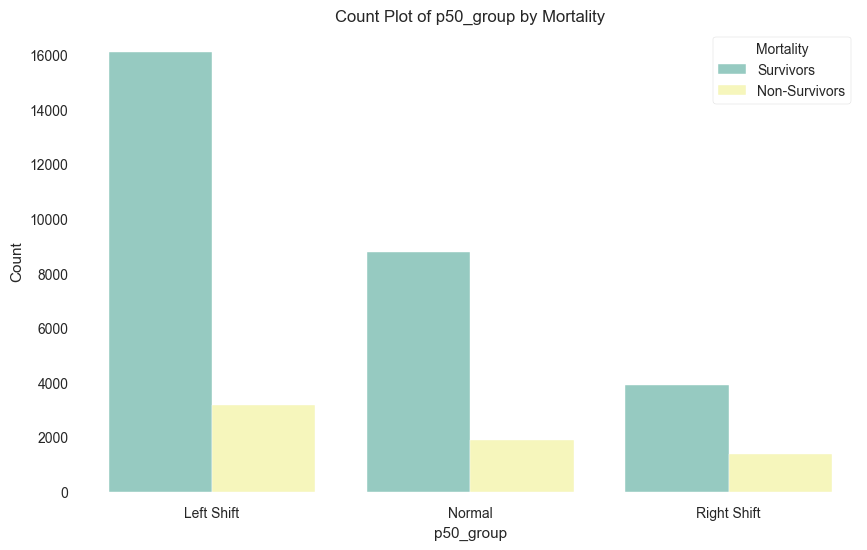

In [40]:
import matplotlib
# matplotlib.use('tkagg')  # Use Tkinter backend

import seaborn as sns
import matplotlib.pyplot as plt


# Convert 'in_hospital_mortality' to strings ('0' or '1')
df['in_hospital_mortality'] = df['in_hospital_mortality'].astype(str)

# Create a count plot to compare 'p50_group' categories with respect to mortality
plt.figure(figsize=(10, 6))
sns.countplot(x='p50_group', hue='in_hospital_mortality', data=df, palette='Set3', order=['Left Shift', 'Normal', 'Right Shift'])
plt.title('Count Plot of p50_group by Mortality')
plt.xlabel('p50_group')
plt.ylabel('Count')
plt.legend(title='Mortality', labels=['Survivors', 'Non-Survivors'])
plt.show()

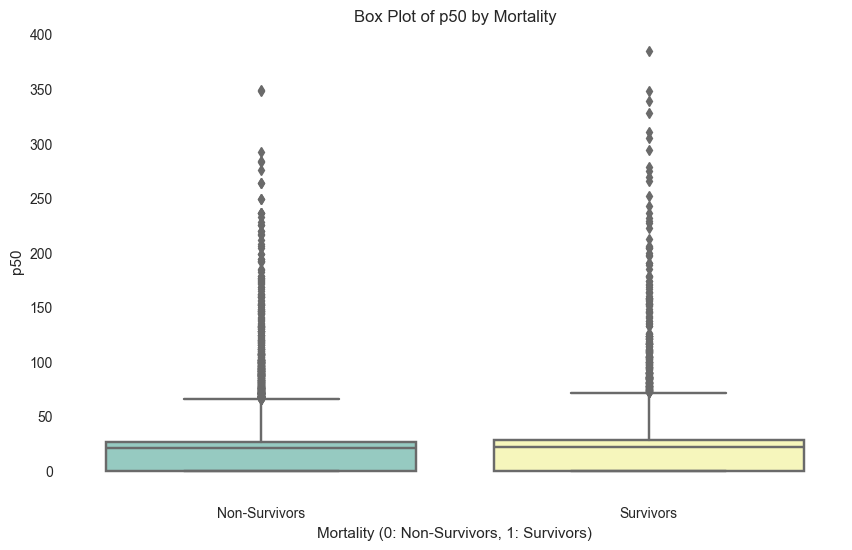

In [41]:


import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for p50 based on mortality
plt.figure(figsize=(10, 6))
sns.boxplot(x='in_hospital_mortality', y='p50', data=df, palette='Set3')
plt.title('Box Plot of p50 by Mortality')
plt.xlabel('Mortality (0: Non-Survivors, 1: Survivors)')
plt.ylabel('p50')
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'])
plt.show()

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


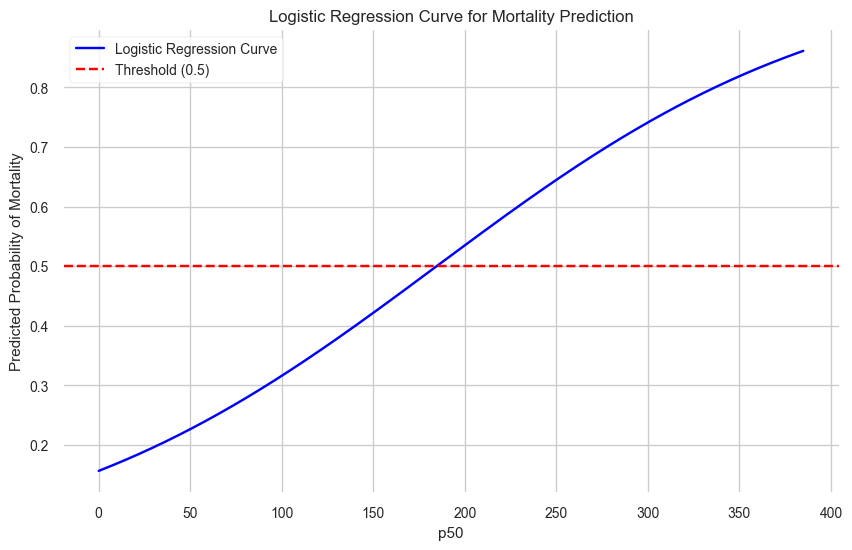

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the data
X_train = df[['p50']]
y_train = df['in_hospital_mortality']
model.fit(X_train, y_train)

# Define a range of 'p50' values for prediction
p50_values = np.linspace(df['p50'].min(), df['p50'].max(), 1000)

# Predict the probability of mortality for each 'p50' value
probabilities = model.predict_proba(p50_values.reshape(-1, 1))[:, 1]

# Create a plot for the logistic regression curve
plt.figure(figsize=(10, 6))
plt.plot(p50_values, probabilities, label='Logistic Regression Curve', color='blue')
plt.xlabel('p50')
plt.ylabel('Predicted Probability of Mortality')
plt.title('Logistic Regression Curve for Mortality Prediction')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.legend()
plt.grid(True)
plt.show()

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


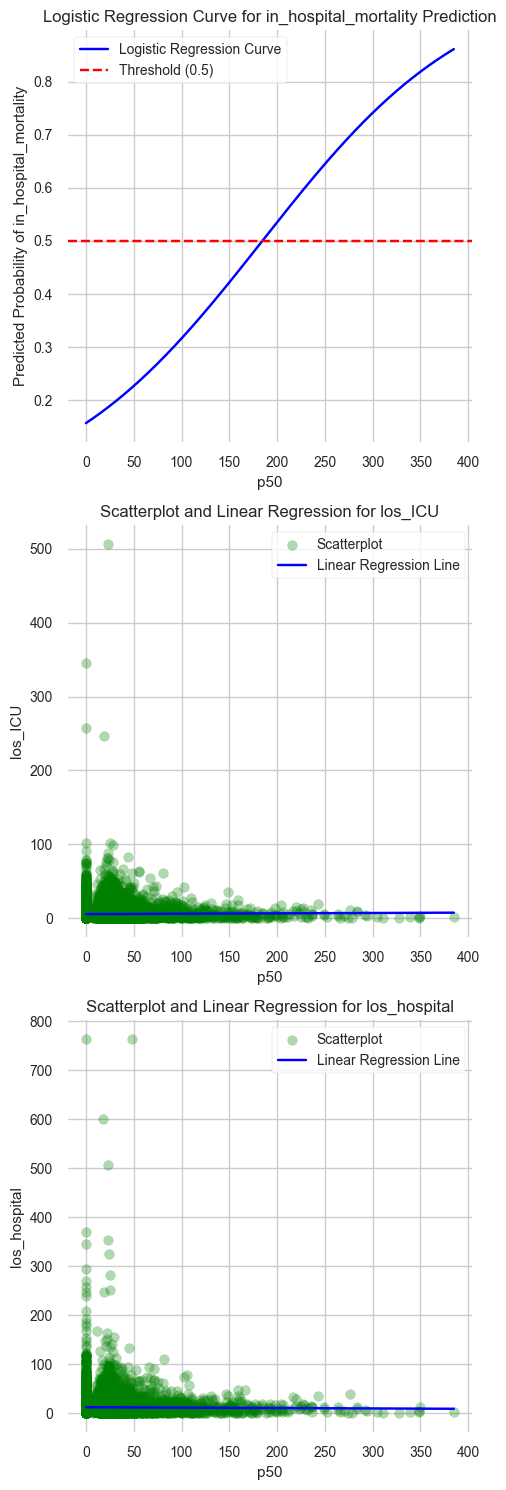

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Define the three outcome variables
outcomes = ['in_hospital_mortality', 'los_ICU', 'los_hospital']

# Create subplots for each outcome arranged vertically
fig, axes = plt.subplots(len(outcomes), 1, figsize=(5, 15))

# Loop through each outcome
for i, outcome in enumerate(outcomes):
    if outcome == 'in_hospital_mortality':
        # Create a logistic regression model for binary outcome
        model = LogisticRegression()

        # Fit the model to the data
        X_train = df[['p50']]
        y_train = df[outcome]
        model.fit(X_train, y_train)

        # Define a range of 'p50' values for prediction
        p50_values = np.linspace(df['p50'].min(), df['p50'].max(), 1000)

        # Predict the probability of the outcome for each 'p50' value
        probabilities = model.predict_proba(p50_values.reshape(-1, 1))[:, 1]

        # Create a plot for the logistic regression curve
        axes[i].plot(p50_values, probabilities, label='Logistic Regression Curve', color='blue')
        axes[i].set_xlabel('p50')
        axes[i].set_ylabel(f'Predicted Probability of {outcome}')
        axes[i].set_title(f'Logistic Regression Curve for {outcome} Prediction')
        axes[i].axhline(0.5, color='red', linestyle='--', label='Threshold (0.5)')
        axes[i].legend()
        axes[i].grid(True)
    else:
        # Create a linear regression model for continuous outcomes
        model = LinearRegression()

        # Fit the model to the data
        X_train = df[['p50']]
        y_train = df[outcome]
        model.fit(X_train, y_train)

        # Define a range of 'p50' values for prediction
        p50_values = np.linspace(df['p50'].min(), df['p50'].max(), 1000)

        # Predict the outcome for each 'p50' value
        outcome_predictions = model.predict(p50_values.reshape(-1, 1))

        # Create a scatterplot for continuous outcomes
        axes[i].scatter(df['p50'], df[outcome], label='Scatterplot', color='green', alpha=0.3)
        axes[i].plot(p50_values, outcome_predictions, label='Linear Regression Line', color='blue')
        axes[i].set_xlabel('p50')
        axes[i].set_ylabel(f'{outcome}')
        axes[i].set_title(f'Scatterplot and Linear Regression for {outcome}')
        axes[i].legend()
        axes[i].grid(True)

# Adjust the layout of subplots
plt.tight_layout()
plt.show()


/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


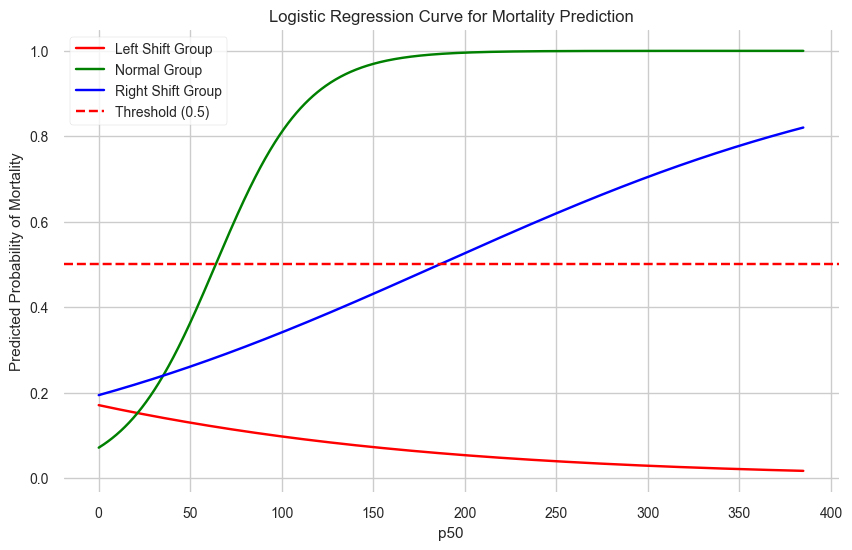

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Define the three groups of 'p50': Right Shift (>30), Normal (22-30), Left Shift (<22)
df['p50_group'] = pd.cut(df['p50'], bins=[-np.inf, 22, 30, np.inf], labels=['Left Shift', 'Normal', 'Right Shift'])

# Create a logistic regression model for each group
groups = ['Left Shift', 'Normal', 'Right Shift']
colors = ['red', 'green', 'blue']

plt.figure(figsize=(10, 6))

# Calculate the minimum and maximum 'p50' values across the entire dataset
min_p50 = df['p50'].min()
max_p50 = df['p50'].max()

for i, group in enumerate(groups):
    # Filter data for the current group
    group_data = df[df['p50_group'] == group]

    # Create a logistic regression model
    model = LogisticRegression()

    # Fit the model to the data
    X_train = group_data[['p50']]
    y_train = group_data['in_hospital_mortality']
    model.fit(X_train, y_train)

    # Define a range of 'p50' values for prediction
    p50_values = np.linspace(min_p50, max_p50, 1000)

    # Predict the probability of mortality for each 'p50' value
    probabilities = model.predict_proba(p50_values.reshape(-1, 1))[:, 1]

    # Create a plot for the logistic regression curve
    plt.plot(p50_values, probabilities, label=f'{group} Group', color=colors[i])

plt.xlabel('p50')
plt.ylabel('Predicted Probability of Mortality')
plt.title('Logistic Regression Curve for Mortality Prediction')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.legend()
plt.grid(True)
plt.show()
